## DS 5110 Project

# Non-EEG Data analysis for Assessment of Neurological Status 

In this day and age brimming with stress, the individual must be aware of their neurological status(physical stress, cognitive stress, emotional stress, and relaxation) using just a few sensors data like arterial oxygen level(SpO2), Heart rate(HR), temperature, acceleration which is readily available in most of the smartwatches. To achieve this, we will use a database of non-EEG physiological signals from the Quality of Life Laboratory at the University of Texas at Dallas. The experiment is conducted on 20 healthy subjects divided into 7 stages. Each stage is categorized into tasks labeled by neurological status

The non-EEG physiological signals data collected by the Quality of Life laboratory at the University of Texas at Dallas is of the raw signal output and cannot be directly processed in Python. As a workaround, we can use the web scraping technologies like selenium to interact with the LightWave, a waveform tool, and an annotation viewer and editor. 

### Data Collection

We have two sets of data to scrape from the https://physionet.org/lightwave/?db=noneeg/1.0.0. Let us first start with the spO2HR data.

In [ ]:
import requests as req
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time 
import pandas as pd
from datetime import time as timeob
import datetime

In [ ]:
# Let us set the options to enable headless mode so that the selinium works in background.
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')  

#Let us chrome web driver
driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)

'''
get_spo2hr:
    This function is used to web scarpe the data of all the 20 subjects. This function saves the spo2hr data of all 20 subjects
    
'''
def get_spo2hr():
    spo2_df = pd.DataFrame(columns=['Time', 'SpO2', 'hr'])
    subjects=['Subject1_SpO2HR','Subject2_SpO2HR','Subject3_SpO2HR','Subject4_SpO2HR','Subject5_SpO2HR','Subject6_SpO2HR','Subject7_SpO2HR','Subject8_SpO2HR','Subject9_SpO2HR','Subject10_SpO2HR','Subject11_SpO2HR','Subject12_SpO2HR','Subject13_SpO2HR','Subject14_SpO2HR','Subject15_SpO2HR','Subject16_SpO2HR','Subject17_SpO2HR','Subject18_SpO2HR','Subject19_SpO2HR','Subject20_SpO2HR']
    for k in range(len(subjects)):
        
        driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)
        driver.get('https://physionet.org/lightwave/?db=noneeg/1.0.0')
        
        driver.find_element_by_xpath("//select[@name='record']/option[text()='"+subjects[k]+"']").click()

    
        time.sleep(1) # To prevent selinium accessing the web elements before they are loaded.

        driver.find_element_by_id('ui-id-3').click()
        driver.find_element_by_id('viewann').click()
        driver.find_element_by_id('viewsig').click()
        driver.find_element_by_id('lwform').click()
     
        for i in range(38): #length of the experiment
            j=0
            stri=""
            driver.find_element_by_xpath('/html/body/div[1]/main/div/div/div/form/div[3]/table/tbody/tr/td[2]/div/button[3]').click()
            time.sleep(1)
            table = driver.find_element_by_xpath("//table[@class='dtable']")
            for row in table.find_elements_by_xpath(".//tr"):
                for td in row.find_elements_by_xpath(".//td"):
                    j+=1
                    if(j%3!=0):
                        stri+=td.text+","
                    else:
                        stri+=td.text+","
                        spo2_df=spo2_df.append({'Time':stri.split(",")[0],'SpO2':stri.split(",")[1],'hr':stri.split(",")[2]},ignore_index=True)
                        stri=""
        
    
    spo2_df.to_csv('spo2FIN_data.csv')
    

get_spo2hr()
print('Done')

Now let us get the AccTempEDA data.

In [ ]:
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')  

driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)



def get_acctempeda():
    acctempeda_df = pd.DataFrame(columns=['Time', 'ax', 'ay','az','temp','EDA'])
    subjects=['Subject2_AccTempEDA','Subject3_AccTempEDA','Subject4_AccTempEDA','Subject5_AccTempEDA','Subject6_AccTempEDA','Subject7_AccTempEDA','Subject8_AccTempEDA','Subject9_AccTempEDA','Subject10_AccTempEDA','Subject11_AccTempEDA','Subject12_AccTempEDA','Subject13_AccTempEDA','Subject14_AccTempEDA','Subject15_AccTempEDA','Subject16_AccTempEDA','Subject17_AccTempEDA','Subject18_AccTempEDA','Subject19_AccTempEDA','Subject20_AccTempEDA']
    #Subject10_AccTempEDA
    for k in range(len(subjects)):
        #time.sleep(0.30)
        print(subjects[k])
        driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)
        driver.get('https://physionet.org/lightwave/?db=noneeg/1.0.0')
        
        driver.find_element_by_xpath("//select[@name='record']/option[text()='"+subjects[k]+"']").click()

    
        time.sleep(0.30)

        driver.find_element_by_id('ui-id-3').click()
        driver.find_element_by_id('viewann').click()
        driver.find_element_by_id('viewsig').click()
        driver.find_element_by_id('lwform').click()
     
        for i in range(228):
        #time.sleep(1)
            j=0
            stri=""
            temp=[]
            if(i==0):
                for l in range(6):
                    driver.find_element_by_xpath('/html/body/div[1]/main/div/div/div/form/div[3]/table/tbody/tr/td[2]/div/button[3]').click()
            else:
                driver.find_element_by_xpath('/html/body/div[1]/main/div/div/div/form/div[3]/table/tbody/tr/td[2]/div/button[3]').click()
                
            time.sleep(0.30)
            table = driver.find_element_by_xpath("//*[@id='sigdata']/table")
            for row in table.find_elements_by_xpath(".//tr"):
                for td in row.find_elements_by_xpath(".//td"):
                    temp.append(td.text)
                if not temp:
                    pass
                else:
                    acctempeda_df=acctempeda_df.append({'Time':temp[0],'ax':temp[1],'ay':temp[2],'az':temp[3],'temp':temp[4],'EDA':temp[5]},ignore_index=True)
                    temp=[]
        
    
    acctempeda_df.to_csv('spo2LOLFIN_data.csv')
    

get_acctempeda()
print('Done')

PS: Since the web-scraping takes a lot of time to navigate and fetch the data for each subject, we have saved the data to csv and is later loaded to perform other tasks

The data returned by get_acctempeda() has measurements recorded for every millisecond which when compared to the data returned by get_spo2hr() is only having measurements for every second. To equalize the data, we have developed get_avg_for_time() which takes the average for the 8 millisecond window to convert it into a second data

In [ ]:
df=pd.read_csv(r'C:\Users\gowta\Desktop\study\DS 5110- IDMP\AccTempEDA_data.csv')


df['Time'] = df['Time'].astype('str') 

'''
get_avg_for_time(df):
    returns the average of 8 window mili second data to convert it into second data.
'''

def get_avg_for_time(df):
    newdf = pd.DataFrame(columns=['ax','ay','az','temp','EDA','Time','Subject'])
    for i in range(20):
        sub = "SUB "+str(i+1)
        subset=(df[df.Subject==sub])[0:17127]
        subset = subset.rolling(8).mean() 
        subset = (subset.iloc[::8, :]).iloc[1:,:]
        
        timestamp = datetime.datetime(100, 1, 1, 0, 1, 0)
        tim=[]
        for j in range(len(subset)):
            tim.append(timestamp)
            timestamp = timestamp + datetime.timedelta(seconds=1)
        
        subset['Time']=tim
        subset['Subject']=[sub for k in range(len(subset))]
        newdf=newdf.append(subset)
    
    newdf = newdf[['Time', 'ax', 'ay', 'az','temp','EDA','Subject']]
    
    return (newdf.reset_index())
        
        
        
        
        

df=get_avg_for_time(df)

'''
processSpo2(df):
    This function adds the correspondin subjectID to the data.
'''
def processSpo2(df):
    new_df = pd.DataFrame(columns=['Time','SpO2','hr','Subject'])
    for i in range(20):
        sub = "SUB "+str(i+1)
        subset=(df[df.Subject==sub])[0:2140]
        #print(subset)
        new_df=new_df.append(subset)
    return (new_df.reset_index())
    

df2 = pd.read_csv(r'C:\Users\gowta\Desktop\study\DS 5110- IDMP\SpO2HR_data.csv')
df2=processSpo2(df2)
df2.Time=df.Time
df_outer = pd.merge(df, df2, on=['Time','Subject'], how='inner')
df_outer = df_outer[['Time','ax','ay','az','temp','EDA','SpO2','hr','Subject']]
df_outer.to_csv('merged.csv')

Let us add the emotional states corresponding to the activites done during the experiment timeline.

In [1]:
import pandas as pd
import datetime
df = pd.read_csv('merged.csv')

In [ ]:
relax1 = datetime.datetime.strptime('00:06:00', '%H:%M:%S').time()
physical_stress1 = datetime.datetime.strptime('00:11:00', '%H:%M:%S').time()
relax2 = datetime.datetime.strptime('00:16:00', '%H:%M:%S').time()
emo_stress1 = datetime.datetime.strptime('00:16:40', '%H:%M:%S').time()
cog_stress1 = datetime.datetime.strptime('00:21:40', '%H:%M:%S').time()
relax3 = datetime.datetime.strptime('00:26:40', '%H:%M:%S').time()
emo_stress2 = datetime.datetime.strptime('00:32:40', '%H:%M:%S').time()
relax4 = datetime.datetime.strptime('00:37:40', '%H:%M:%S').time()

'''
get_activity(curr_time):
Returns the emotional status corresponding to the current time.
'''
def get_activity(curr_time):
  this_time = datetime.datetime.strptime(curr_time, '%Y-%m-%d %H:%M:%S').time()
  if this_time < relax1:
    return "RELAX"
  elif this_time < physical_stress1:
    return "PHYSICAL"
  elif this_time < relax2:
    return "RELAX"
  elif this_time < emo_stress1:
    return "EMOTIONAL"
  elif this_time < cog_stress1:
    return "COGNITIVE"
  elif this_time < relax3:
    return "RELAX"
  elif this_time < emo_stress2:
    return "EMOTIONAL"
  else:
    return "RELAX"

In [ ]:
df['Activity'] = "NA"
for idx, row in df.iterrows():
  df.at[idx,'Activity'] = get_activity(row['Time'])

df.head()
df['Activity'].unique()

## Exploratory Data Analysis

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def get_color_for_activity(activity):
    if activity == 'RELAX':
        return "green"
    elif activity == 'PHYSICAL':
        return "red"
    elif activity == 'COGNITIVE':
        return "blue"
    elif activity == 'EMOTIONAL':
        return "yellow"
    else:
        return "black";


class DataVisualizer:

    def __init__(self, file_name):
        df = pd.read_csv(Path(file_name))
        self.df = df  # saves data frame

    def visualize_temperature(self, subject="all"):
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")
        sns.lmplot('Time',
                   'temperature',
                   data=self.df[self.df['Subject'] == subject] if subject != "all" else self.df,
                   fit_reg=False,
                   hue="Activity")
        plt.title('Temperature variation for subject = ' + subject)
        plt.show()

    def visualize_heart_rate(self, subject="all"):
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")
        sns.lmplot('Time',
                   'hr',
                   data=self.df[self.df['Subject'] == subject] if subject != "all" else self.df,
                   fit_reg=False,
                   hue="Activity")
        plt.title('HR variation for subject = ' + subject)
        plt.show()

    def visualize_SP(self, subject="all"):
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")
        sns.lmplot('Time',
                   'SpO2',
                   data=self.df[self.df['Subject'] == subject] if subject != "all" else self.df,
                   fit_reg=False,
                   hue="Activity")
        plt.title('SP02 variation for subject = ' + subject)
        plt.show()

    def visualize_EDA(self, subject="all"):
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")
        sns.lmplot('Time',
                   'EDA',
                   data=self.df[self.df['Subject'] == subject] if subject != "all" else self.df,
                   fit_reg=False,
                   hue="Activity")
        plt.title('EDA variation for subject = ' + subject)
        plt.show()

    def visualize_hr_activity(self, activity="all"):
        data = self.df[self.df['Activity'] == activity] if activity != "all" else self.df
        x = data.hr
        plt.hist(x, bins=10)
        plt.xlabel('hr')
        plt.ylabel('frequency')
        plt.title('Heart rate based on ' + activity)
        plt.show()

    def visualize_temperature_activity(self, activity="all"):
        data = self.df[self.df['Activity'] == activity] if activity != "all" else self.df
        x = data['temperature']
        plt.hist(x)
        plt.xlabel('temperature')
        plt.ylabel('frequency')
        plt.title('Temperature based on ' + activity)
        plt.show()

    def visualize_EDA_activity(self, activity="all"):
        data = self.df[self.df['Activity'] == activity] if activity != "all" else self.df
        x = data.EDA
        plt.hist(x, bins=5)
        plt.xlabel('EDA')
        plt.ylabel('frequency')
        plt.title('EDA based on ' + activity)
        plt.show()

    def visualize_SpO2_activity(self, activity="all"):
        data = self.df[self.df['Activity'] == activity] if activity != "all" else self.df
        x = data.SpO2
        plt.hist(x, bins=10)
        plt.xlabel('SPO2')
        plt.ylabel('frequency')
        plt.title('Spo2 based on ' + activity)
        plt.show()

    def visualize_3D_ax_ay_az(self, activity="all"):
        data = self.df[self.df['Activity'] == activity] if activity != "all" else self.df
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data['ax'], data['ay'], data['az'],
                   c=data['Activity'].apply(lambda row: get_color_for_activity(row)), s=60)
        ax.view_init(30, 185)
        plt.title('a x/y/z based on ' + activity)
        plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from DataVisualizer import DataVisualizer

df = pd.read_csv('final_data.csv')

# Exploratory data analysis

print(df.head(5))

print(df.tail(5))

# Checking the data type

print(df.dtypes)

# Total number of rows and columns
print(df.shape)

# Rows containing duplicate data

duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# Drop Missing or Null Values

print(df.isnull().sum())  # no Null values

# Detecting Outliers

sns.boxplot(x=df["temperature"])
plt.show()

sns.boxplot(x=df["hr"])
plt.show()

sns.boxplot(x=df["EDA"])
plt.show()

sns.boxplot(x=df["SpO2"])
plt.show()

# Finding the correlations between the variables.
# Dropping irrelevant columns
df1 = df.drop(['Index'], axis=1)
plt.figure(figsize=(10, 10))
c = df1.corr()
sns.heatmap(c, cmap='summer', annot=True)
plt.show()

# pair plots

sns.set_style("whitegrid");
sns.pairplot(df1, hue="Activity", size=3);
plt.show()



data_visualizer = DataVisualizer(r'C:\Users\vjcla\Desktop\Project\final_data.csv')

# Plotting Histograms to check  distribution of each attribute  depending on activity

data_visualizer.visualize_hr_activity("PHYSICAL")
data_visualizer.visualize_temperature_activity("PHYSICAL")
data_visualizer.visualize_EDA_activity("PHYSICAL")
data_visualizer.visualize_SpO2_activity("PHYSICAL")
data_visualizer.visualize_3D_ax_ay_az()


# Distribution of attributes over the entire experiment for each subject
# if you dont pass a subject it will display all
data_visualizer.visualize_temperature("SUB 1")
data_visualizer.visualize_heart_rate("SUB 1")
data_visualizer.visualize_SP("SUB 1")
data_visualizer.visualize_EDA("SUB 1")

## Data Modeling

Let us first perform different tests to check for different issues with the data which we can later handle while building the pipeline

Since this is a classification problem, Let us first check if there is any class imbalance

In [ ]:
data=pd.read_csv('final_data.csv')
data=data[["Time","ax","ay","az","temp","EDA","SpO2","hr","Subject","Activity"]]

X = data[["ax","ay","az","temp","EDA","SpO2","hr"]]
y = data[["Activity"]]

data.Activity.value_counts()

Since we have a class imbalance we hace to perform any of the class imbalance methods like oversampling or undersampling. Since we have a small dataset let us perform oversampling using SMOTE later in pipeline.

To perform Feature selection, Let us choose a wrapper method,Recursive Forward Elimination.

![title](img/wrapper_methods.jpg)

All the algorithms that use l1 or l2 norms require standardisation. It is also useful to standardise the data so that algorithms become less computational heavy

With these pre-processing steps in mind, Let us build a pipeline and perform gridsearchcv to get the best model and parameters.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Preprocessing imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


data=pd.read_csv('final_data.csv')

data=data[["Time","ax","ay","az","temp","EDA","SpO2","hr","Subject","Activity"]]

X = data[["ax","ay","az","temp","EDA","SpO2","hr"]]
y = data[["Activity"]]


imba_pipeline = Pipeline([('RFE',RFE(KNeighborsClassifier())),('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',xgboost.XGBClassifier())])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)

arr = [xgboost.XGBClassifier(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=22,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=True,n_jobs=-1,random_state=0,verbose=0,warm_start=False,class_weight='balanced')]
grid_param = [
                
                {"Model": [KNeighborsClassifier()], #We cannot perform RFE on KNN
                 "Model__n_neighbors":[1,2,3,4,5,6,7,8,9,10]
                 },
                {
                    "RFE":[RFE(RandomForestClassifier())],
                    "Model":[RandomForestClassifier()],
                    "Model__n_estimators":[50,70,100,120],
                    "Model__criterion":['gini', 'entropy'],
                    "Model__max_depth":[10,15,20,22,25],
                    "Model__oob_score":['True','False']
                },
                {   "RFE":[RFE(LogisticRegression())],
                    "Model": [LogisticRegression()],
                 "Model__penalty": ['l2','l1'],
                 "Model__C": np.logspace(0, 4, 10),
                 "Model__multi_class":['auto']
                 },
                {   "RFE":[RFE(xgboost.XGBClassifier())],
                    "Model": [xgboost.XGBClassifier()],
                 },
        
                {
                    "RFE":[RFE(LinearDiscriminantAnalysis())],
                    "Model":[LinearDiscriminantAnalysis()],
                    "Model__solver":['svd','eigen']
                },
                {
                    "RFE":[RFE(QuadraticDiscriminantAnalysis())],
                    "Model":[QuadraticDiscriminantAnalysis()],
                    "Model__tol":[0.001,0.0001,0.000001]
                    
                },
                {
                    "RFE":[RFE(BaggingClassifier())],
                    "Model":[BaggingClassifier()],
                    "Model__base_estimator":[SVC()],
                    "Model__n_estimators":[5,7,9,11,12]
                }]

gridsearch = GridSearchCV(imba_pipeline, grid_param, cv=10, verbose=0,n_jobs=-1,refit=True) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Additionally adding SVM with RBF kernel 

In [6]:
import warnings
warnings.filterwarnings("ignore")
#Preprocessing imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC



data=pd.read_csv('final_data.csv')

data=data[["Time","ax","ay","az","temp","EDA","SpO2","hr","Subject","Activity"]]

X = data[["ax","ay","az","temp","EDA","SpO2","hr"]]
y = data[["Activity"]]

y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',OneVsRestClassifier(svm.SVC(kernel='rbf')))])
#0.1 - 0.5 --> 
#0.1 ,1 ... 100..10000 --> c

grid_param = [
                
                {"Model": [OneVsRestClassifier(svm.SVC(kernel='rbf'))], #We cannot perform RFE on KNN
                 "Model__estimator__C":[0.1,10,100,50,1000],
                 "Model__estimator__gamma":[0.1,0.2,0.3,0.4,0.5]
                 }]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)
gridsearch = GridSearchCV(imba_pipeline, grid_param, cv=10, verbose=0,n_jobs=-1,refit=True) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('preprocessor', StandardScaler()), ('smt', SMOTE()),
                ('Model',
                 OneVsRestClassifier(estimator=SVC(C=1000, gamma=0.5)))])
The mean accuracy of the model is: 0.9495327102803738


In [11]:
import warnings
warnings.filterwarnings("ignore")
#Preprocessing imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC



data=pd.read_csv('final_data.csv')

data=data[["Time","ax","ay","az","temp","EDA","SpO2","hr","Subject","Activity"]]

X = data[["ax","ay","az","temp","EDA","SpO2","hr"]]
y = data[["Activity"]]

y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',OneVsRestClassifier(svm.SVC(kernel='rbf',C=1000,gamma=0.5)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(imba_pipeline, X_train, y_train, cv=cv)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores = cross_val_score(imba_pipeline, X_test, y_test, cv=cv)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.95619159 0.93866822 0.94889019 0.9541472  0.93983645 0.94421729
 0.94889019 0.94334112 0.94363318 0.94071262 0.9494743  0.9448014
 0.95122664 0.94713785 0.95035047 0.94976636 0.94334112 0.94450935
 0.94158879 0.94567757 0.94567757 0.94509346 0.95297897 0.94304907
 0.9494743  0.94509346 0.94363318 0.94363318 0.94538551 0.94830607
 0.94129673 0.94772196 0.94421729 0.93983645 0.95297897 0.9541472
 0.94246495 0.95005841 0.94363318 0.94450935 0.94742991 0.95122664
 0.95239486 0.94334112 0.94304907 0.9494743  0.9448014  0.95035047
 0.9494743  0.94421729]
cv_scores mean:0.9465070093457945
[0.87850467 0.9088785  0.90420561 0.90070093 0.91588785 0.88084112
 0.90303738 0.89485981 0.89485981 0.91004673 0.89369159 0.89135514
 0.91121495 0.90070093 0.90303738 0.89252336 0.90537383 0.89836449
 0.88434579 0.89018692 0.90537383 0.88901869 0.89719626 0.89719626
 0.89485981 0.92640187 0.89369159 0.89602804 0.89602804 0.91238318
 0.90070093 0.90771028 0.90303738 0.89836449 0.88901869 0.90420561
 0.891

Let us plot the ROC curve for each class for the SVM model

Test accuracy:  0.9428738317757009


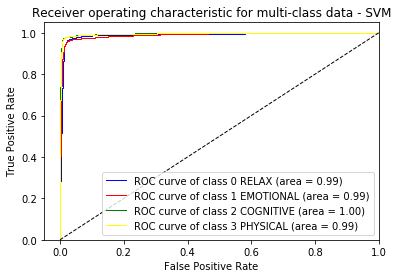

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import pandas as pd
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

data=pd.read_csv('final_data.csv')

data=data[["Time","ax","ay","az","temp","EDA","SpO2","hr","Subject","Activity"]]

X = data[["ax","ay","az","temp","EDA","SpO2","hr"]]
y = data[["Activity"]]

y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',OneVsRestClassifier(svm.SVC(kernel='rbf',C=1000,gamma=0.5)))])
n_classes = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)
# fit a model
classifier = OneVsRestClassifier(imba_pipeline)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)# predict probabilities
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    lw = 1
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','yellow'])
classes = ['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} {2} (area = {1:0.2f})'
             ''.format(i, roc_auc[i],classes[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data - SVM')
plt.legend(loc="lower right")
plt.show()

Now let’s also estimate the confusion matrix.

[[3989  259   92  220]
 [ 304 1228   31   37]
 [ 337  211  644    8]
 [ 147   92   22  939]]


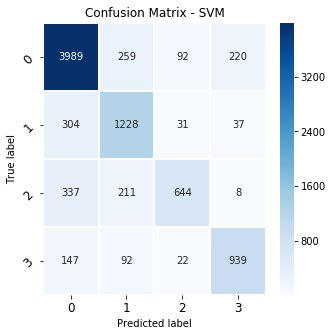


Accuracy: 0.67

Micro Precision: 0.71
Micro Recall: 0.87
Micro F1-score: 0.78

Macro Precision: 0.67
Macro Recall: 0.87
Macro F1-score: 0.75

Weighted Precision: 0.73
Weighted Recall: 0.87
Weighted F1-score: 0.79

Classification Report

              precision    recall  f1-score   support

     Class 1       0.84      0.87      0.85      4560
     Class 2       0.61      0.83      0.70      1600
     Class 3       0.54      0.88      0.67      1200
     Class 4       0.68      0.90      0.77      1200

   micro avg       0.71      0.87      0.78      8560
   macro avg       0.67      0.87      0.75      8560
weighted avg       0.73      0.87      0.79      8560
 samples avg       0.77      0.87      0.80      8560



/Users/yingshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [9]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.svm import SVC
#Models

import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
#%matplotlib tk
from sklearn.preprocessing import label_binarize


data = pd.read_csv('final_data.csv')
X = data[["ax","az","EDA"]]
y = data[["Activity"]]
X=X.values
y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

n_classes = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=123)
imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',OneVsRestClassifier(svm.SVC(kernel='rbf',C=1000,gamma=0.5)))])
# fit a model
classifier = OneVsRestClassifier(imba_pipeline)
classifier.fit(X_train, y_train)
# predict the labels/classes of the test set
y_pred = classifier.predict(X_test)
# build the confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

# plot resulting confusion matrix figure
fig, ax = plt.subplots(figsize=(5,5))
heatmap=sns.heatmap(cnf_matrix, linewidths=1,annot=True, fmt='',cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45,  fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - SVM')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))


Let us print all the best features selected by the RFE method

In [ ]:
init = ["ax","ay","az","temp","EDA","SpO2","hr"]
finalFeatureIndices = gridsearch.best_estimator_.named_steps["RFE"].get_support(indices=True)
finalFeatureList = [init[i] for i in finalFeatureIndices]
print(finalFeatureList)

Since we got the best model and the parameters from grid search, let us fit the model using only that model with appropriate paramters and the subset of featues

In [17]:
X = data[["ax","az","EDA"]]
y = data[["Activity"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=13)

imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',RandomForestClassifier(max_depth=22, n_estimators=120,
                                        oob_score='False'))])

print(np.mean(cross_val_score(imba_pipeline, X_train, y_train, cv=10)))
print(np.mean(cross_val_score(imba_pipeline, X_test, y_test, cv=10)))

C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.9486273364485982


C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)
C:\Users\gowta\Anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.9227803738317757


Let us visualize a decision tree from the random forest classifier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import tree
model=RandomForestClassifier(max_depth=22, n_estimators=120,
                                        oob_score='False')
model.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix,classification_report
pred2=model.predict(X_test)
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))


dt = model.estimators_[11]
fn=["ax","az","EDA"]
cn=["CS","R","PS","ES"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[11],
               feature_names = fn, 
               class_names=cn,filled=True,
                rounded=True);
fig.savefig('rf_individualtree.png')

Let us plot the ROC curve for each class using the RandomForestClassifier

Test accuracy:  0.9329439252336449


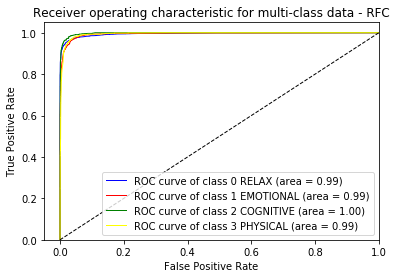

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


data = pd.read_csv('final_data.csv')
X = data[["ax","az","EDA"]]
y = data[["Activity"]]
X=X.values
y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

n_classes = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=13)


imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',RandomForestClassifier(max_depth=22, n_estimators=120,
                                        oob_score='False'))])

classifier = OneVsRestClassifier(imba_pipeline)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    lw = 1
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','yellow'])
classes = ['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} {2} (area = {1:0.2f})'
             ''.format(i, roc_auc[i],classes[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data - RFC')
plt.legend(loc="lower right")
plt.show()

Now let’s also estimate the confusion matrix.

[[4413   50   36   61]
 [  63 1482   22   33]
 [  36   31 1130    3]
 [  55   38   10 1097]]


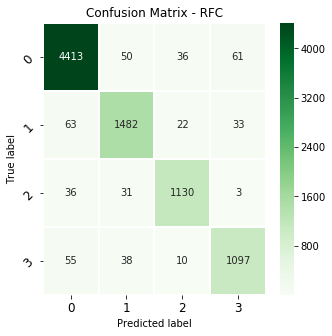


Accuracy: 0.93

Micro Precision: 0.94
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.92
Macro Recall: 0.95
Macro F1-score: 0.93

Weighted Precision: 0.94
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.97      0.96      0.97      4560
     Class 2       0.91      0.93      0.92      1600
     Class 3       0.91      0.96      0.94      1200
     Class 4       0.87      0.94      0.91      1200

   micro avg       0.94      0.95      0.95      8560
   macro avg       0.92      0.95      0.93      8560
weighted avg       0.94      0.95      0.95      8560
 samples avg       0.94      0.95      0.95      8560



/Users/yingshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [8]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import seaborn as sns
#Models

import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
#%matplotlib tk
from sklearn.preprocessing import label_binarize


data = pd.read_csv('final_data.csv')
X = data[["ax","az","EDA"]]
y = data[["Activity"]]
X=X.values
y = label_binarize(y, classes=['RELAX', 'EMOTIONAL', 'COGNITIVE','PHYSICAL'])

n_classes = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=13)

# fit the model using the training set
imba_pipeline = Pipeline([('preprocessor',StandardScaler() ),('smt', SMOTE()),
                ('Model',RandomForestClassifier(max_depth=22, n_estimators=120,
                                        oob_score='False'))])
classifier = OneVsRestClassifier(imba_pipeline)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
# predict the labels/classes of the test set
y_pred = classifier.predict(X_test)
# build the confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

# plot resulting confusion matrix figure
fig, ax = plt.subplots(figsize=(5,5))
heatmap=sns.heatmap(cnf_matrix, linewidths=1,annot=True, fmt='',cmap='Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45,  fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - RFC')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))
